# ***Objective***
The objective of this project is to develop a machine learning model that accurately identifies fraudulent credit card transactions. By analyzing the "creditcard.csv" dataset, we aim to preprocess the data, train various algorithms, and evaluate their performance. Our goal is to implement a robust model that can effectively detect fraud, thereby minimizing financial losses and enhancing the security of credit card transactions. The project will focus on optimizing model accuracy while maintaining efficiency and scalability. Additionally, it seeks to provide actionable insights into the factors contributing to fraudulent activities, ultimately offering a reliable solution for real-time fraud detection in the financial sector.


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
ccfd = pd.read_csv('creditcard.csv')
ccfd.shape

(284807, 31)

# Note: 
Good evening sir/ma'am! Actually here I am encopuntering erros and I don't know why head(), sample() function weren't working. I even write it in new cells but they weren't working and giving me erros. So please don't mind them. I wrote these codes in googlecolab and in that, this dataset was taking quite a long time to upload on it.

In [88]:
ccfd.head()

AttributeError: 'Index' object has no attribute '_format_flat'

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20 

In [60]:
ccfd.sample(6)

AttributeError: 'Index' object has no attribute '_format_flat'

           Time        V1        V2        V3        V4        V5        V6  \
144925  86495.0 -0.791614  0.555503  1.013863 -0.115145  0.479735 -0.277214   
25435   33608.0  1.301015 -0.011570  0.034332  0.074159 -0.478279 -1.160198   
90089   62862.0  1.447314 -1.003698  0.699457 -1.388842 -1.470571 -0.425674   
13513   23947.0  1.438414 -0.530690 -1.195610 -1.644393  1.709809  3.075475   
103383  68627.0  1.100037  0.161860  0.435884  1.069724 -0.257040 -0.577054   
23148   32614.0 -1.534245 -0.704165  2.513202 -0.058184  2.098605  0.114273   

              V7        V8        V9       V10       V11       V12       V13  \
144925  0.662626  0.150880 -0.086146 -0.420758  0.008266 -1.190836 -3.552266   
25435   0.149925 -0.259790  0.399286 -0.233543 -0.579332  0.022191 -0.632678   
90089  -1.098600 -0.079147 -1.851865  1.346122 -0.084911 -0.379342  1.222863   
13513  -0.894103  0.625086  0.132280  0.298664  1.075605 -3.147370  1.791878   
103383  0.211459 -0.202221 -0.055331 -0.101696

In [24]:
pd.set_option('display.max_columns', None)

In [25]:
ccfd.sample(5)

AttributeError: 'Index' object has no attribute '_format_flat'

            Time        V1        V2        V3        V4        V5        V6  \
33398    37217.0  1.315601  0.413148 -0.018953  0.487834  0.132331 -0.574307   
38681    39493.0 -1.732248 -1.712776  2.429622 -1.993613 -0.064766 -1.840837   
158621  111537.0 -2.155091  0.079676  0.324627 -0.717564  2.063326 -2.863657   
250972  155149.0  0.314635  0.922326 -0.426041 -0.365928  1.160753 -0.796634   
121581   76245.0  1.193895  0.540702 -0.455779  0.662466  0.349156 -0.602605   

              V7        V8        V9       V10       V11       V12       V13  \
33398   0.146563 -0.215923 -0.080276 -0.314457 -0.623759  0.557736  1.498122   
38681  -1.409319 -0.066671 -2.052206  0.952865 -0.415221 -1.020190  0.445368   
158621  1.777302 -0.702439  0.504306 -1.273186  0.807244 -2.077912  1.555390   
250972  1.184601 -0.434430 -0.211787 -0.599275 -0.527759 -0.557577 -0.049138   
121581  0.252307 -0.062587 -0.504569 -0.488277  2.122893  0.984662  0.388232   

             V14       V15       V16  

In [26]:
ccfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [27]:
ccfd.isnull().mean()

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [28]:
ccfd.duplicated().sum()

1081

In [29]:
ccfd = ccfd.drop_duplicates()

In [30]:
ccfd.shape

(283726, 31)

In [31]:
ccfd.isnull().mean()

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [32]:
ccfd.duplicated().sum()

0

In [39]:
ccfd['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [42]:
ccfd.describe()

AttributeError: 'Index' object has no attribute '_format_flat'

                Time             V1             V2             V3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean    94811.077600       0.005917      -0.004135       0.001613   
std     47481.047891       1.948026       1.646703       1.508682   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54204.750000      -0.915951      -0.600321      -0.889682   
50%     84692.500000       0.020384       0.063949       0.179963   
75%    139298.000000       1.316068       0.800283       1.026960   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.002966       0.001828      -0.001139       0.001801   
std         1.414184       1.377008       1.331931       1.227664   
min        -5.683171    -113.743307     -26.160506     -43.557242   
25%        -0.850134      -0.6898

In [63]:
ccfd.groupby('Class').mean()
#O represents Normal Transaction...
#1 represents Fraud

AttributeError: 'Index' object has no attribute '_format_flat'

               Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94838.202258  0.008258 -0.006271  0.012171 -0.007860  0.005453   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9       V10       V11       V12  \
Class                                                                         
0      0.002419  0.009637 -0.000987  0.004467  0.009824 -0.006576  0.010832   
1     -1.397737 -5.568731  0.570636 -2.581123 -5.676883  3.800173 -6.259393   

            V13       V14       V15       V16       V17       V18       V19  \
Class                                                                         
0      0.000189  0.012064  0.000161  0.007164  0.011535  0.003887 -0.001178   
1     -0.109334 -6.971723 -0.092929 -4.139946 -6.665836 -2.246308  0.680659   

            V20       V21       V22       V23       V24       V25       V

# ***Data Visualization***

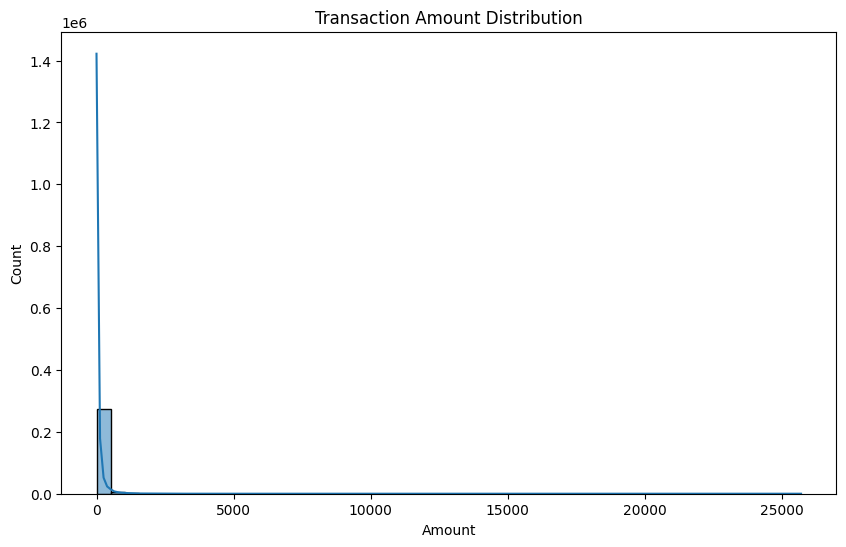

In [36]:
plt.figure(figsize=(10,6))
sns.histplot(ccfd['Amount'],bins=50,kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

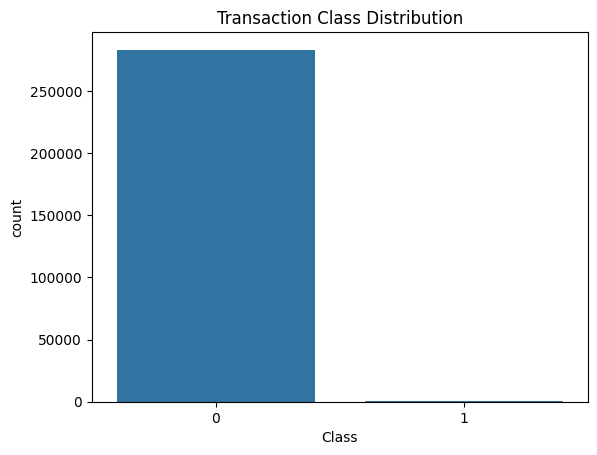

In [37]:
sns.countplot(x=ccfd['Class'])
plt.title("Transaction Class Distribution")
plt.show()

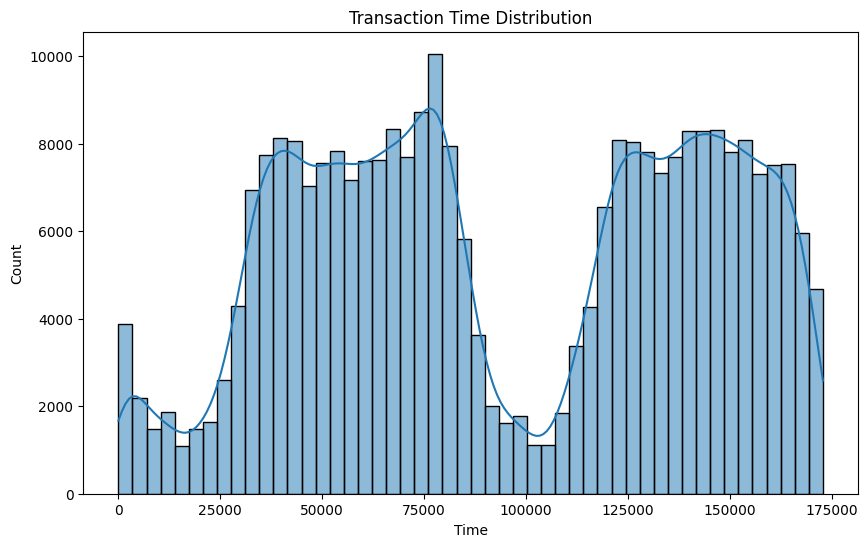

In [47]:
plt.figure(figsize=(10,6))
sns.histplot(ccfd['Time'],bins=50,kde=True)
plt.title("Transaction Time Distribution")
plt.show()

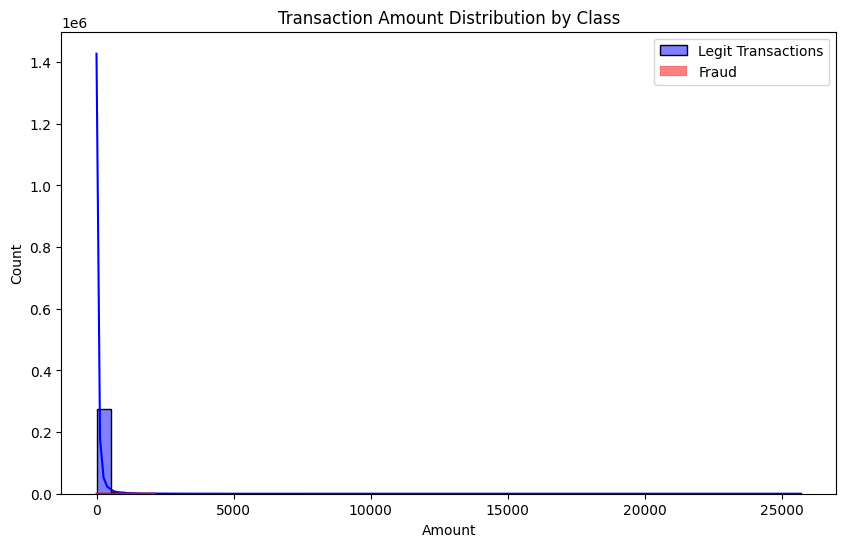

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(ccfd[ccfd['Class'] == 0]['Amount'], bins=50, color='blue', kde=True, label='Legit Transactions')
sns.histplot(ccfd[ccfd['Class'] == 1]['Amount'], bins=50, color='red', kde=True, label='Fraud')
plt.title('Transaction Amount Distribution by Class')
plt.legend()
plt.show()

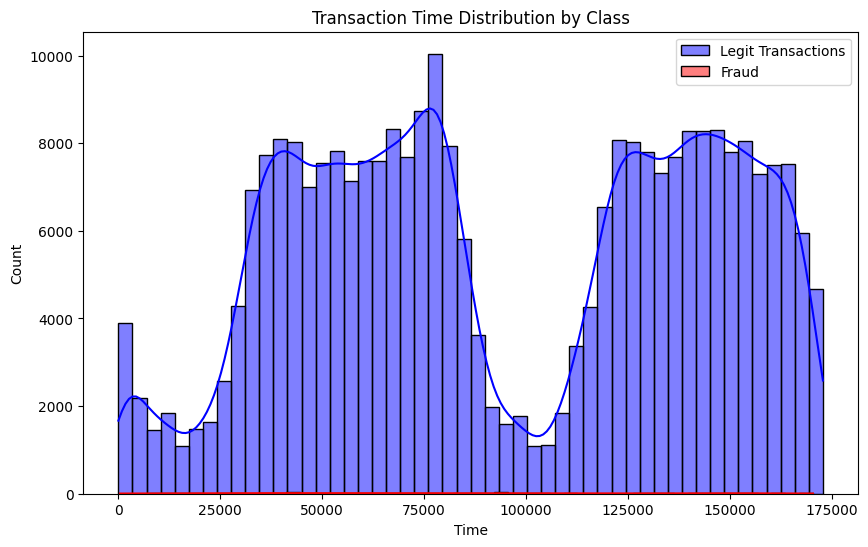

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(ccfd[ccfd['Class'] == 0]['Time'], bins=50, color='blue', kde=True, label='Legit Transactions')
sns.histplot(ccfd[ccfd['Class'] == 1]['Time'], bins=50, color='red', kde=True, label='Fraud')
plt.title('Transaction Time Distribution by Class')
plt.legend()
plt.show()

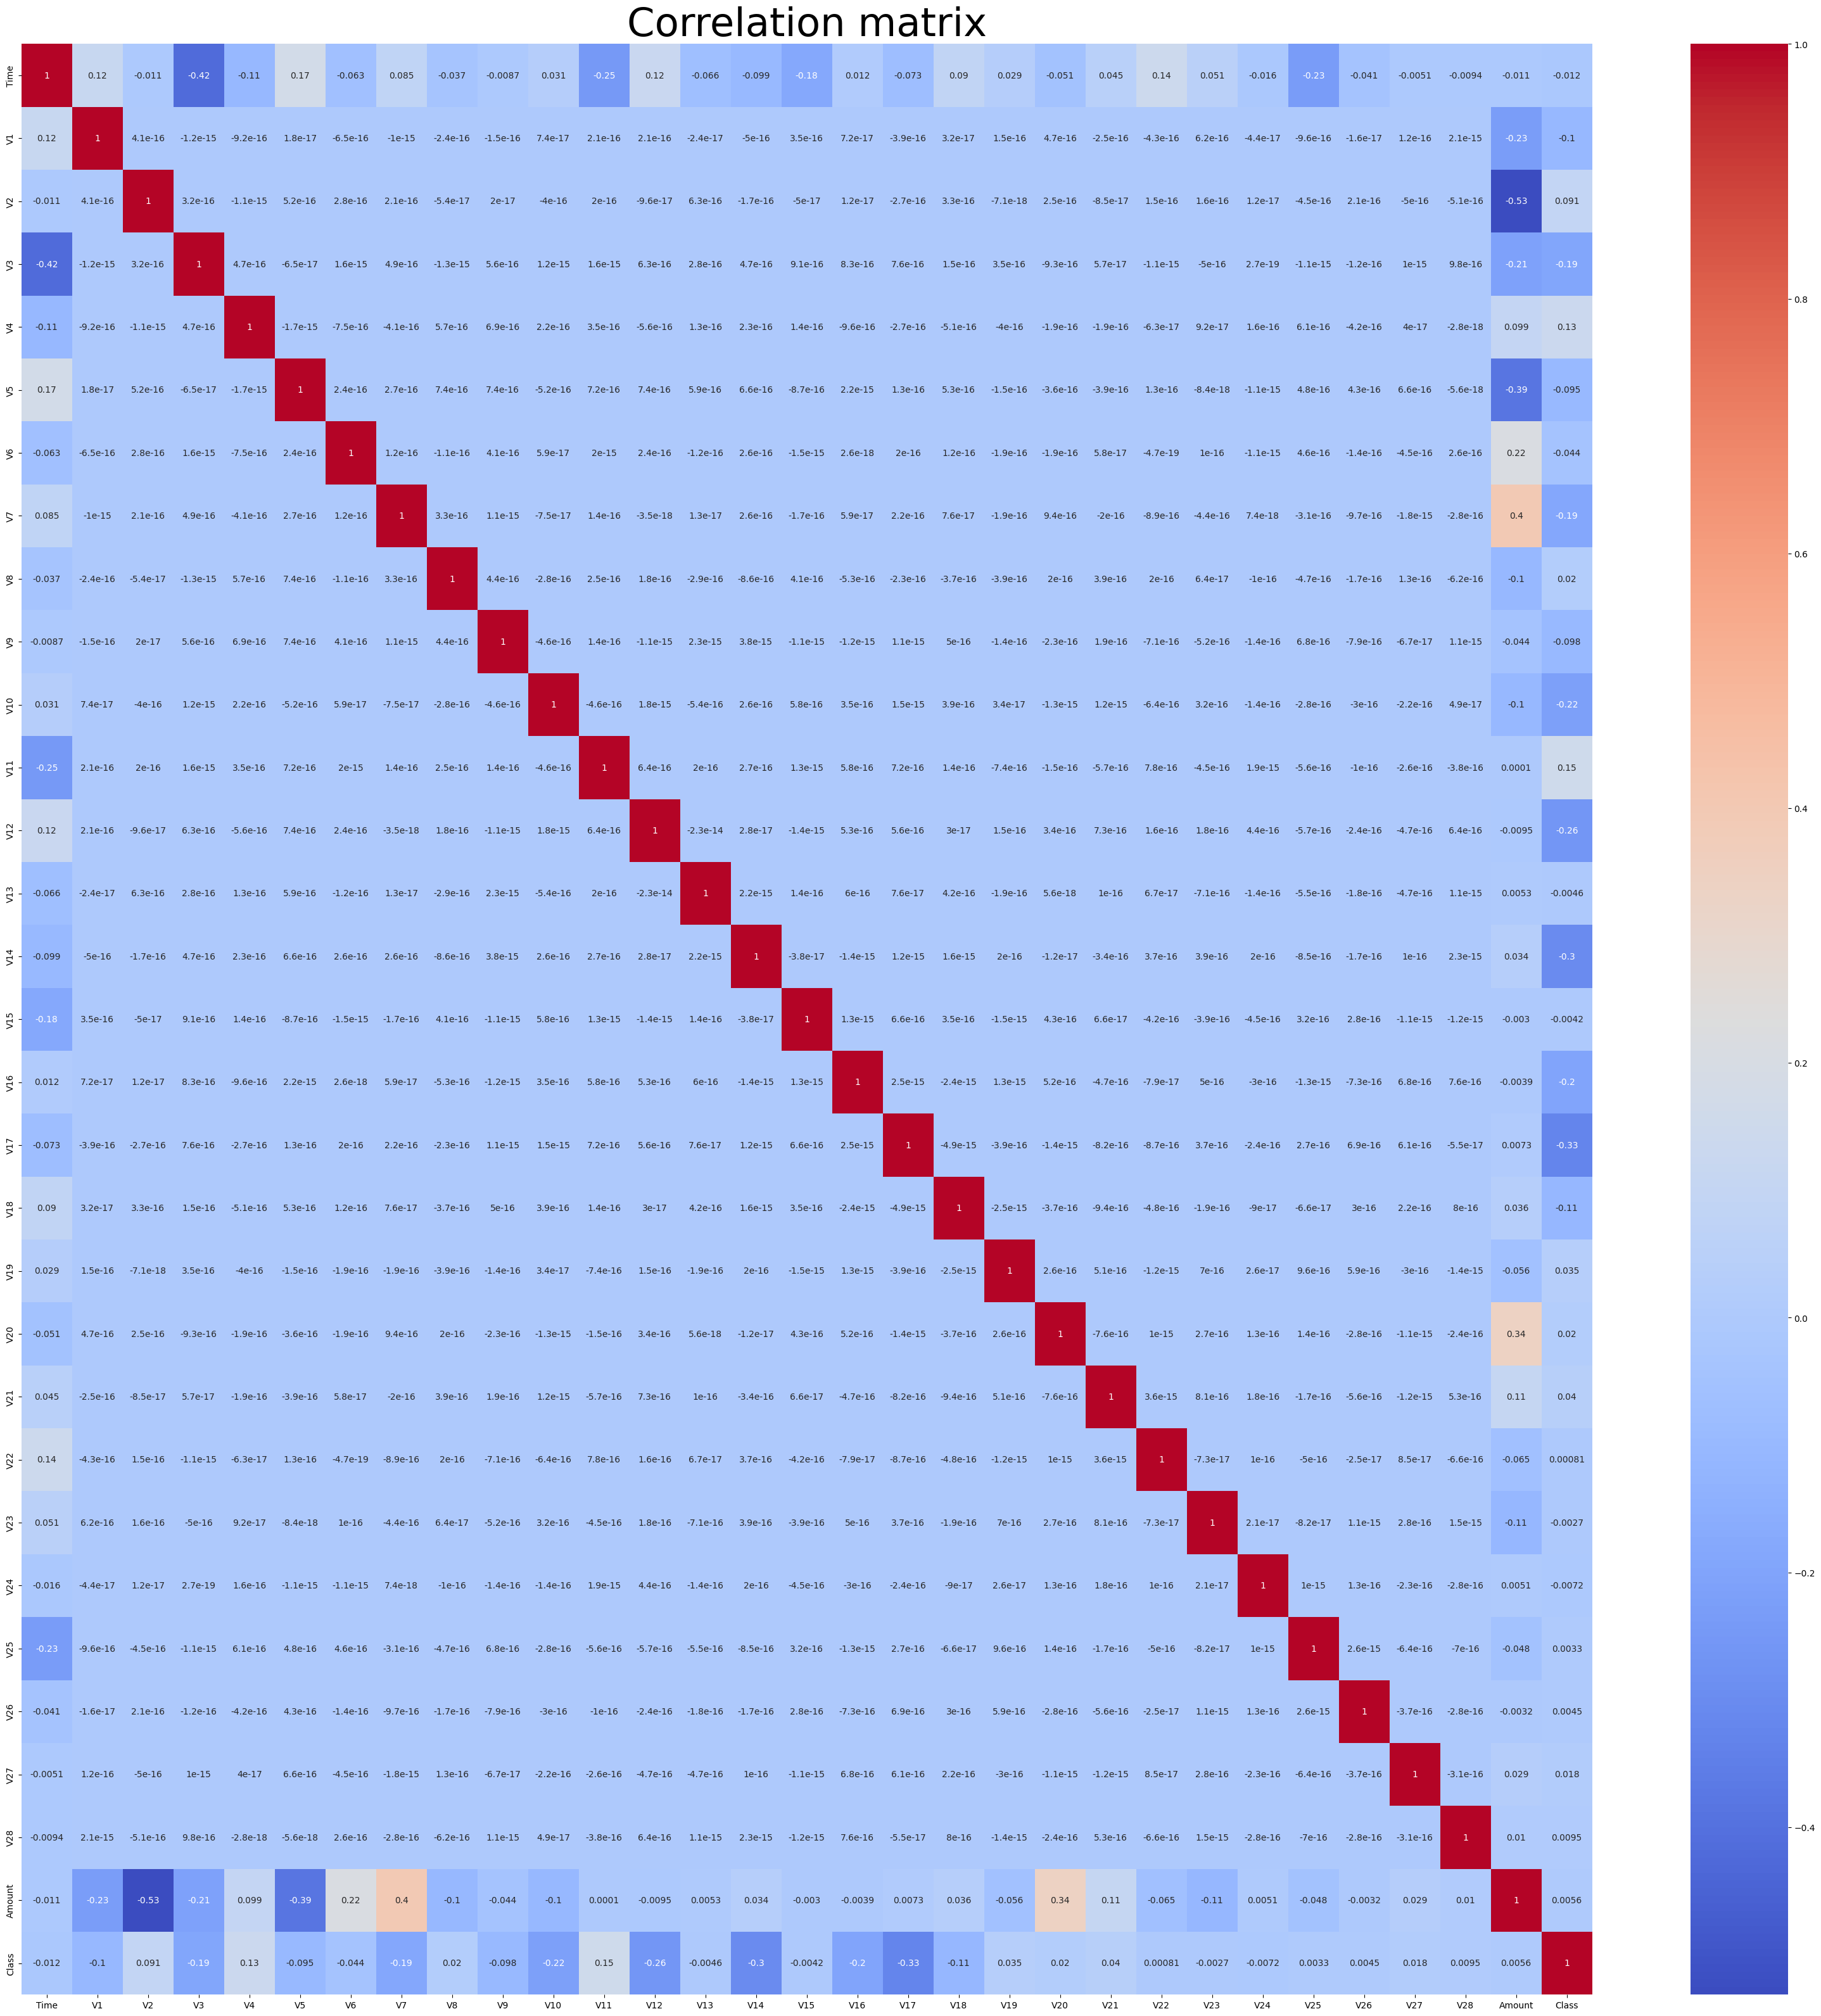

In [50]:
plt.figure(figsize=(40,40))
sns.heatmap(ccfd.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation matrix', fontsize=45)
plt.show()

# ***Model Building***

In [51]:
X = ccfd.drop(columns=['Class'])
y = ccfd['Class']

In [52]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaler = ss.fit_transform(X)

In [53]:
X_scaler

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.3, random_state=42)

In [55]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Accuracy score of Logistic Regression:", accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test, y_pred))

Accuracy score of Logistic Regression: 99.92743700478681
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.63      0.74       136

    accuracy                           1.00     85443
   macro avg       0.94      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [77]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred4 = dtc.predict(X_test)
print("Accuracy score of Decision Tree Classifier:", accuracy_score(y_test, y_pred4)*100)
print(classification_report(y_test, y_pred4))

Accuracy score of Decision Tree Classifier: 99.9098814414288
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.70      0.77      0.73       136

    accuracy                           1.00     85443
   macro avg       0.85      0.89      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred1 = rfc.predict(X_test)
print("Accuracy score of Random Forest Classifier:", accuracy_score(y_test, y_pred1)*100)
print(classification_report(y_test, y_pred1))

Accuracy score of Random Forest Classifier: 99.9602073897218
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.93      0.81      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



# ***Balancing unbalanced data***

In [65]:
from imblearn.over_sampling import SMOTE
os = SMOTE()

In [66]:
x_smote, y_smote = os.fit_resample(X_train, y_train)


Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



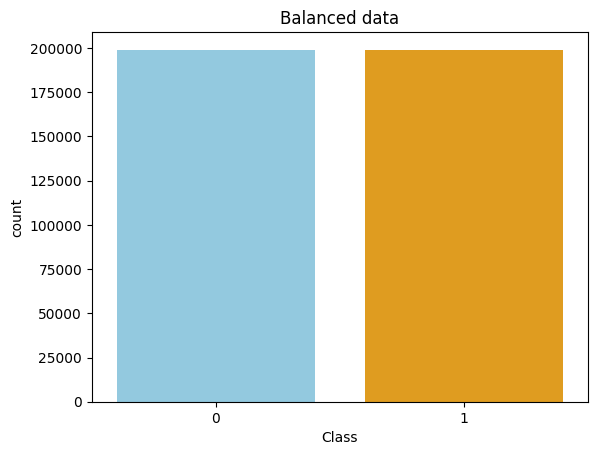

In [67]:
sns.countplot(x=y_smote, palette=['skyblue', 'orange'])
plt.title("Balanced data")
plt.show()

# ***Model improvement on balanced data***

In [71]:
from sklearn.linear_model import LogisticRegression
lrr = LogisticRegression()
lrr.fit(x_smote, y_smote)
y_pred2 = lrr.predict(X_test)
print("Accuracy score of Logistic Regression:", accuracy_score(y_test, y_pred2)*100)
print(classification_report(y_test, y_pred2))

Accuracy score of Logistic Regression: 97.33974696581346
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.93      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.54     85443
weighted avg       1.00      0.97      0.99     85443



In [78]:
from sklearn.tree import DecisionTreeClassifier
dtcc = DecisionTreeClassifier()
dtcc.fit(x_smote, y_smote)
y_pred5 = dtcc.predict(X_test)
print("Accuracy score of Decision Tree Classifier:", accuracy_score(y_test, y_pred5)*100)
print(classification_report(y_test, y_pred5))

Accuracy score of Decision Tree Classifier: 99.73198506606744
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.35      0.78      0.48       136

    accuracy                           1.00     85443
   macro avg       0.67      0.89      0.74     85443
weighted avg       1.00      1.00      1.00     85443



In [73]:
from sklearn.ensemble import RandomForestClassifier
rfcc = RandomForestClassifier(n_jobs=-1)
rfcc.fit(x_smote, y_smote)
y_pred3 = rfcc.predict(X_test)
print("Accuracy score of Random Forest Classifier:", accuracy_score(y_test, y_pred3)*100)
print(classification_report(y_test, y_pred3))

Accuracy score of Random Forest Classifier: 99.9531851643786
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.84      0.87      0.86       136

    accuracy                           1.00     85443
   macro avg       0.92      0.93      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [85]:
alg_lr = accuracy_score(y_test, y_pred2)*100
alg_dtc = accuracy_score(y_test, y_pred5)*100
alg_rfc = accuracy_score(y_test, y_pred3)*100

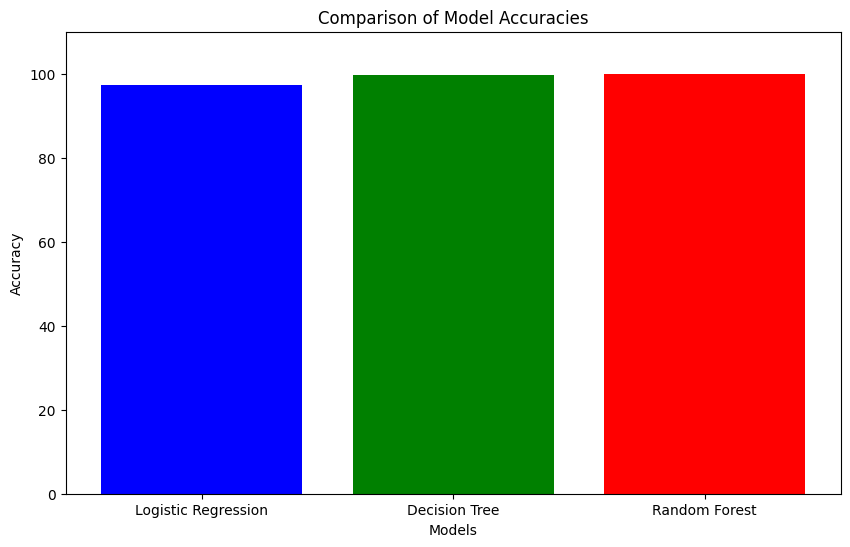

In [86]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
alg = [alg_lr, alg_dtc, alg_rfc]

plt.figure(figsize=(10, 6))
plt.bar(models, alg, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 110)
plt.show()

# ***Conclusion***
As, you can see RandomForestClassifier() is performing very well as compared to other two models. So, we'll go with Random Forest Classifier.

# ***Saving the model***

In [87]:
import pickle

with open('credit_card_model.pkl', 'wb') as file:
    pickle.dump(rfcc, file)